In [1]:
import torch
import torch.nn.functional as F
import torch.nn as nn

In [2]:
torch.set_printoptions(precision=2)
SEED = 42
_ = torch.manual_seed(SEED)

# Flatten

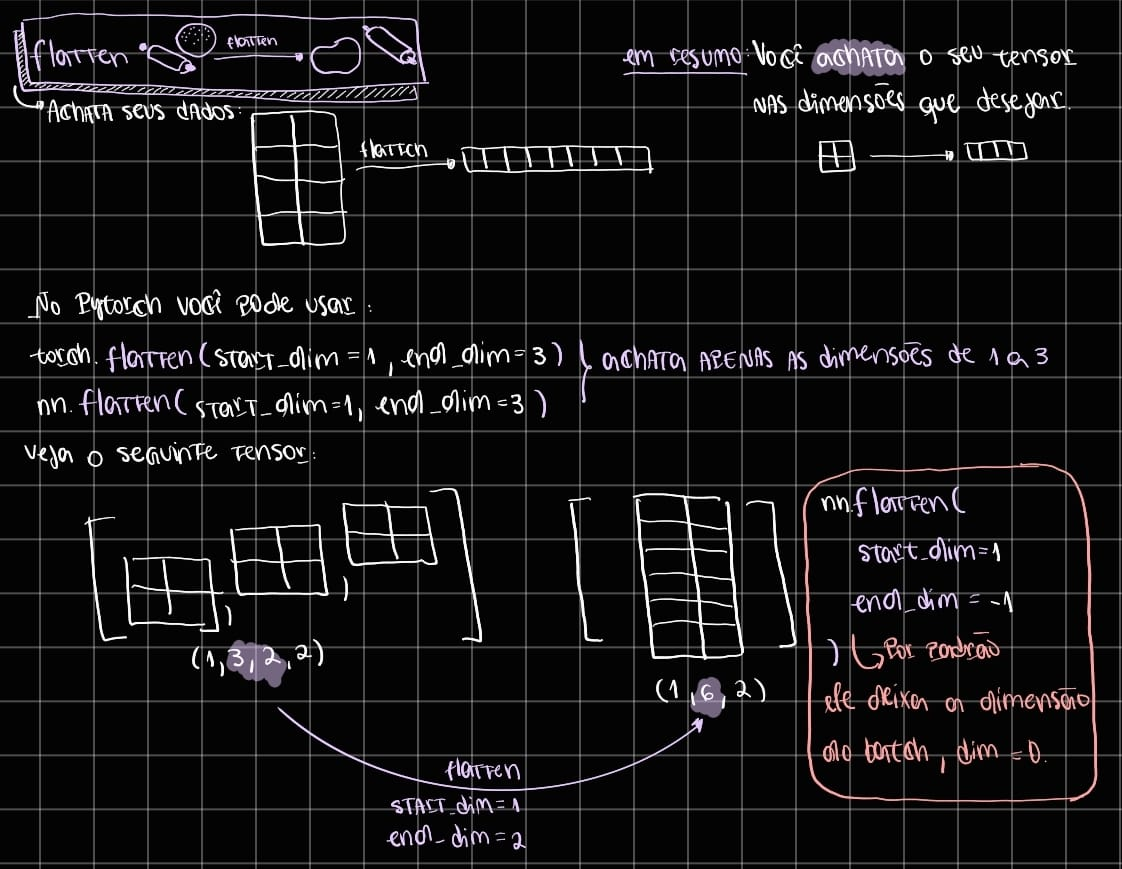

In [50]:
# Creating our example tensor
torch.manual_seed(SEED)
tensor = torch.randn(2, 3, 4, 5)
tensor

tensor([[[[ 1.93,  1.49,  0.90, -2.11,  0.68],
          [-1.23, -0.04, -1.60, -0.75,  1.65],
          [-0.39, -1.40, -0.73, -0.56, -0.77],
          [ 0.76,  1.64, -0.16, -0.50,  0.44]],

         [[-0.76,  1.08,  0.80,  1.68,  1.28],
          [ 1.30,  0.61,  1.33, -0.23,  0.04],
          [-0.25,  0.86, -1.38, -0.87, -0.22],
          [ 1.72,  0.32, -0.42,  0.31, -0.77]],

         [[-1.56,  1.00, -0.88, -0.60, -1.27],
          [ 2.12, -1.23, -0.49, -0.91, -0.66],
          [ 0.08,  0.53, -0.49,  1.19, -0.81],
          [-0.74, -1.40,  0.04, -0.06,  0.68]]],


        [[[-0.10,  1.84, -1.18,  1.38,  1.45],
          [ 0.86,  2.22,  0.52,  0.35, -0.20],
          [-1.05,  1.28, -0.17,  0.52,  0.06],
          [ 0.43,  0.58, -0.64, -2.21, -0.75]],

         [[ 0.01, -0.34, -1.34, -0.59,  0.54],
          [ 0.52,  1.14,  0.05,  0.74, -0.48],
          [-1.05,  0.60, -1.72, -0.83,  1.33],
          [ 0.48, -2.51,  0.49,  0.78,  0.03]],

         [[ 0.64,  0.58,  1.07, -0.45,  1.03],
 

flattening dimensions 1 and 2, dim1 has 3 and dim2 has 4 values, as we will flatten them we will have: 3 x 4 = 12 and our tensor will go from a shape of (2, 3, 4, 5) to (2, 12, 5)

In [51]:
flatten = torch.flatten(tensor, start_dim=1, end_dim=2)
print(flatten)

tensor([[[ 1.93,  1.49,  0.90, -2.11,  0.68],
         [-1.23, -0.04, -1.60, -0.75,  1.65],
         [-0.39, -1.40, -0.73, -0.56, -0.77],
         [ 0.76,  1.64, -0.16, -0.50,  0.44],
         [-0.76,  1.08,  0.80,  1.68,  1.28],
         [ 1.30,  0.61,  1.33, -0.23,  0.04],
         [-0.25,  0.86, -1.38, -0.87, -0.22],
         [ 1.72,  0.32, -0.42,  0.31, -0.77],
         [-1.56,  1.00, -0.88, -0.60, -1.27],
         [ 2.12, -1.23, -0.49, -0.91, -0.66],
         [ 0.08,  0.53, -0.49,  1.19, -0.81],
         [-0.74, -1.40,  0.04, -0.06,  0.68]],

        [[-0.10,  1.84, -1.18,  1.38,  1.45],
         [ 0.86,  2.22,  0.52,  0.35, -0.20],
         [-1.05,  1.28, -0.17,  0.52,  0.06],
         [ 0.43,  0.58, -0.64, -2.21, -0.75],
         [ 0.01, -0.34, -1.34, -0.59,  0.54],
         [ 0.52,  1.14,  0.05,  0.74, -0.48],
         [-1.05,  0.60, -1.72, -0.83,  1.33],
         [ 0.48, -2.51,  0.49,  0.78,  0.03],
         [ 0.64,  0.58,  1.07, -0.45,  1.03],
         [-0.70,  1.01, -0.33,  

In [52]:
print(flatten.shape)

torch.Size([2, 12, 5])


flattening in all dimensions

In [54]:
flatten = torch.flatten(tensor)
print(flatten)

tensor([ 1.93,  1.49,  0.90, -2.11,  0.68, -1.23, -0.04, -1.60, -0.75,  1.65,
        -0.39, -1.40, -0.73, -0.56, -0.77,  0.76,  1.64, -0.16, -0.50,  0.44,
        -0.76,  1.08,  0.80,  1.68,  1.28,  1.30,  0.61,  1.33, -0.23,  0.04,
        -0.25,  0.86, -1.38, -0.87, -0.22,  1.72,  0.32, -0.42,  0.31, -0.77,
        -1.56,  1.00, -0.88, -0.60, -1.27,  2.12, -1.23, -0.49, -0.91, -0.66,
         0.08,  0.53, -0.49,  1.19, -0.81, -0.74, -1.40,  0.04, -0.06,  0.68,
        -0.10,  1.84, -1.18,  1.38,  1.45,  0.86,  2.22,  0.52,  0.35, -0.20,
        -1.05,  1.28, -0.17,  0.52,  0.06,  0.43,  0.58, -0.64, -2.21, -0.75,
         0.01, -0.34, -1.34, -0.59,  0.54,  0.52,  1.14,  0.05,  0.74, -0.48,
        -1.05,  0.60, -1.72, -0.83,  1.33,  0.48, -2.51,  0.49,  0.78,  0.03,
         0.64,  0.58,  1.07, -0.45,  1.03, -0.70,  1.01, -0.33,  0.52,  0.39,
        -0.58, -0.17, -0.57,  0.51, -0.48, -0.49,  0.27, -0.56,  0.68,  0.44])


In [55]:
# 2 * 3 * 4 * 5 = 120
print(flatten.shape)

torch.Size([120])


# View

The `.view()` method in PyTorch rearranges the elements of a tensor to a new shape without changing the data. It is useful for changing the shape of a tensor while keeping the number of elements the same.

`.view()` rearranges the tensor by saving it in the same location in memory, it does not make any copies, `.reshape()` can make copies.

To use `.view()` your tensor needs to be `.contiguous()`.
```python
x = torch.randn(3, 4)
x_t = x.t()  # Transposes the tensor, making it non-contiguous
print(x_t.is_contiguous())  # False
# Trying to use .view() on a non-contiguous tensor throws an error
x_t.view(12)  # RuntimeError: view size is not compatible...

x_t_cont = x_t.contiguous()  # Copies data to make it contiguous
x_t_view = x_t_cont.view(12)  # It worked
```

`contiguous()`: PyTorch stores tensors in memory as a continuous block of values. However, certain operations, such as transposition:
```python
x = torch.randn(3, 4)
x = x.t()  # transpose
x = x.permute()  # permutation
x = x[:, ::-1]  # slicing
```
Can change the way data is accessed without actually reorganizing memory. This creates non-contiguous tensors.  

The .view() method relies on the contiguous memory layout to simply “reinterpret” the data without moving it. If the tensor is non-contiguous, the organization of the data in memory does not allow for a direct shape change, so view() fails.

A tensor being contiguous means that its elements are *stored sequentially in memory*, with no jumps between them. In PyTorch, this is important because some operations require the data to be organized this way to ensure computational efficiency.

If a tensor is not contiguous, it may have been transposed or derived from another tensor through operations that change the order of the elements in memory. To ensure that a tensor is contiguous, you can use:

It is `more efficient` than reshape it does not copy the tensor it just rearranges it

In [3]:
torch.manual_seed(SEED)
tensor = torch.rand(2, 2, 2, 2)
tensor

tensor([[[[0.88, 0.92],
          [0.38, 0.96]],

         [[0.39, 0.60],
          [0.26, 0.79]]],


        [[[0.94, 0.13],
          [0.93, 0.59]],

         [[0.87, 0.57],
          [0.74, 0.43]]]])

In [6]:
# check if we can use view
tensor.is_contiguous()

True

The multiplication of the number of elements in each dimension should give the same as before, for example:

old -> (2, 2, 2, 2) = 2 * 2 * 2 * 2 = 16
new -> 4 * 4 = 16

If `you put -1` it will infer what number it should be

In [16]:
tensor.view(2, 2, 4)

tensor([[[0.88, 0.92, 0.38, 0.96],
         [0.39, 0.60, 0.26, 0.79]],

        [[0.94, 0.13, 0.93, 0.59],
         [0.87, 0.57, 0.74, 0.43]]])

In [17]:
tensor.view(2, 2, -1)

tensor([[[0.88, 0.92, 0.38, 0.96],
         [0.39, 0.60, 0.26, 0.79]],

        [[0.94, 0.13, 0.93, 0.59],
         [0.87, 0.57, 0.74, 0.43]]])

PyTorch maintains the order of storage in memory (the so-called **row-major order**). That is, it reads the data in the original format (in this case, a 1D vector) and places it in the new format (the 2x3 matrix), filling the new shape row by row.
```python
# se quiser saber como está alocado os valores na memoria
print(tensor.storage())
```

**Summary**: Basically, it goes through the order in which it is in memory and reorders the data, filling it in from the first to the last, finishing the rearrangement of the data. 

# Reshape

Similar to `view()`, but may create copies if necessary.

More flexible than `.view()` because the tensor does not need to be `.contiguous()`

In [4]:
torch.manual_seed(SEED)
tensor = torch.rand(2, 2, 2, 2)
tensor

tensor([[[[0.88, 0.92],
          [0.38, 0.96]],

         [[0.39, 0.60],
          [0.26, 0.79]]],


        [[[0.94, 0.13],
          [0.93, 0.59]],

         [[0.87, 0.57],
          [0.74, 0.43]]]])

The multiplication of the number of elements in each dimension should give the same as before, for example:

old -> (2, 2, 2, 2) = 2 * 2 * 2 * 2 = 16  
new -> 4 * 4 = 16

If `you put -1` it will infer what number it should be

In [8]:
tensor.reshape(4, 4)

tensor([[0.88, 0.92, 0.38, 0.96],
        [0.39, 0.60, 0.26, 0.79],
        [0.94, 0.13, 0.93, 0.59],
        [0.87, 0.57, 0.74, 0.43]])

In [15]:
tensor.reshape(2, 2, -1)

tensor([[[0.88, 0.92, 0.38, 0.96],
         [0.39, 0.60, 0.26, 0.79]],

        [[0.94, 0.13, 0.93, 0.59],
         [0.87, 0.57, 0.74, 0.43]]])

In [18]:
tensor.reshape(2, 2, 4)

tensor([[[0.88, 0.92, 0.38, 0.96],
         [0.39, 0.60, 0.26, 0.79]],

        [[0.94, 0.13, 0.93, 0.59],
         [0.87, 0.57, 0.74, 0.43]]])

PyTorch maintains the order of storage in memory (the so-called **row-major order**). That is, it reads the data in the original format (in this case, a 1D vector) and places it in the new format (the 2x3 matrix), filling the new shape row by row.
```python
# se quiser saber como está alocado os valores na memoria
print(tensor.storage())
```

**Summary**: Basically, it goes through the order in which it is in memory and reorders the data, filling it in from the first to the last, finishing the rearrangement of the data. 

# Axis

In PyTorch, `axis` (or dimension) defines how data is organized within a tensor. Each tensor has one or more dimensions, and different operations can be applied along these dimensions.

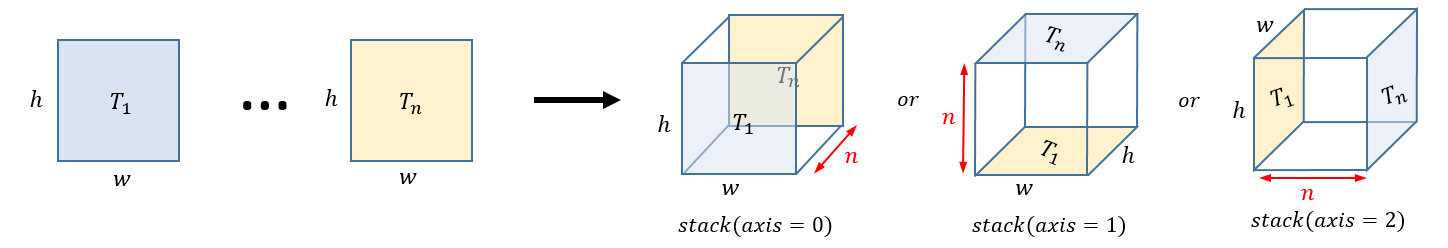

<div align="center">
    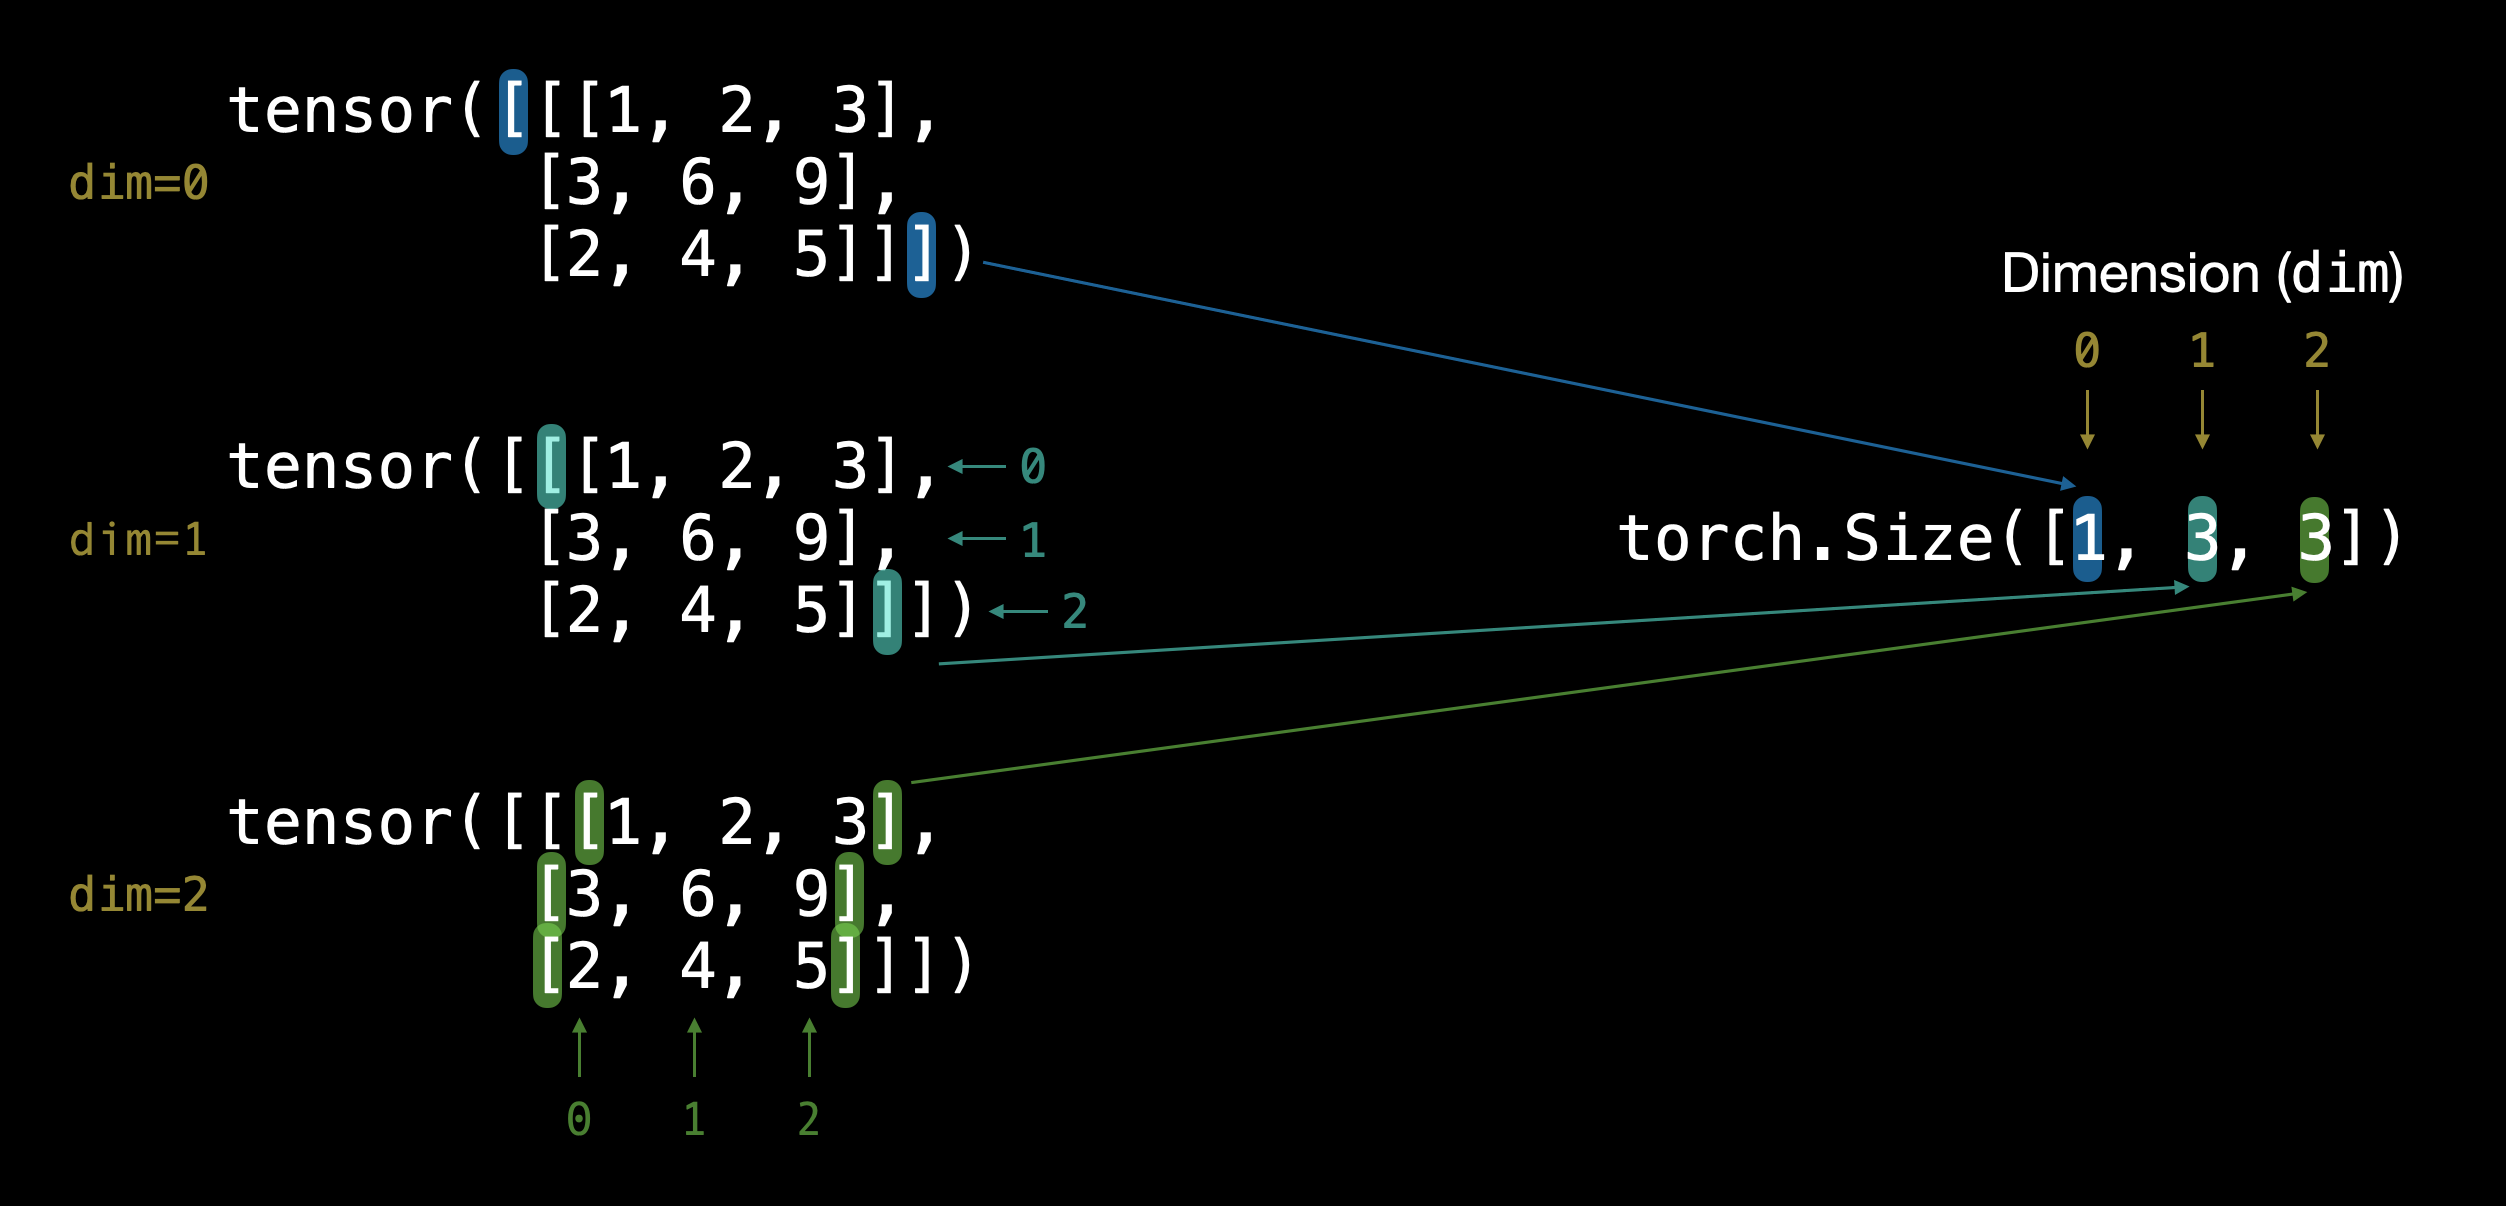
</div>

## Axis - Mathematical Operations

`sum()`, `mean()`, `max()`, `argmax()`, `norm()`

All these operations work the same way along the desired dimension.

<div align="center">
    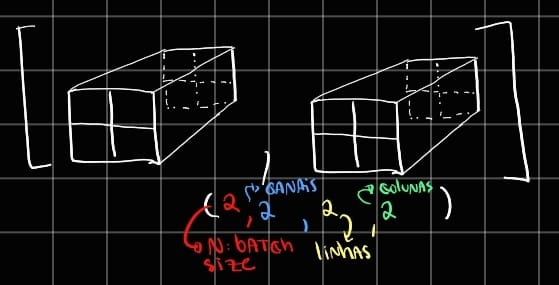
</div>

In [29]:
tensor = torch.arange(1, 17, dtype=torch.float).view(2, 2, 2, 2)  # or .reshape(2, 2, 2, 2)
tensor

tensor([[[[ 1.,  2.],
          [ 3.,  4.]],

         [[ 5.,  6.],
          [ 7.,  8.]]],


        [[[ 9., 10.],
          [11., 12.]],

         [[13., 14.],
          [15., 16.]]]])

In [32]:
print(f'Sum: {tensor.sum()}')
print(f'Mean: {tensor.mean()}')
print(f'Max: {tensor.max()}')
print(f'Min: {tensor.min()}')
print(f'Argmax(id): {tensor.argmax()}')
print(f'Argmin(id): {tensor.argmin()}')
print(f'Norm: {tensor.norm()}')

Sum: 136.0
Mean: 8.5
Max: 16.0
Min: 1.0
Argmax(id): 15
Argmin(id): 0
Norm: 38.678157806396484


If no dim is passed the operation is performed on the entire tensor.

In [34]:
# Sum in batch dimension
tensor.sum(dim=0)

tensor([[[10., 12.],
         [14., 16.]],

        [[18., 20.],
         [22., 24.]]])

In [35]:
# Sum in the dimension of channels
tensor.sum(dim=1)

tensor([[[ 6.,  8.],
         [10., 12.]],

        [[22., 24.],
         [26., 28.]]])

In [36]:
tensor.sum(dim=2)

tensor([[[ 4.,  6.],
         [12., 14.]],

        [[20., 22.],
         [28., 30.]]])

In [38]:
tensor.sum(dim=3)  # or dim=-1

tensor([[[ 3.,  7.],
         [11., 15.]],

        [[19., 23.],
         [27., 31.]]])

In [45]:
# We can chain the operation several times along the dimensions.
print(tensor.sum(dim=(0, 1, 2, 3)) == tensor.sum())
tensor.sum(dim=(1, 3))

tensor(True)


tensor([[14., 22.],
        [46., 54.]])

In [48]:
tensor.sum(dim=1, keepdim=True)

tensor([[[[ 6.,  8.],
          [10., 12.]]],


        [[[22., 24.],
          [26., 28.]]]])

In [55]:
tensor.sum(dim=(3, 0)) == tensor.sum(dim=(0, 3))

tensor([[True, True],
        [True, True]])

`keepdim` makes the dimensions of the initial tensor remain.

In [51]:
tensor.sum(dim=(0, 1, 2, 3), keepdim=True)

tensor([[[[136.]]]])

# Linspace & Arange

Create tensors according to your wishes.

In [68]:
tensor = torch.linspace(0, 1, steps=100)
tensor

tensor([0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11,
        0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23,
        0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.30, 0.31, 0.32, 0.33, 0.34, 0.35,
        0.36, 0.37, 0.38, 0.39, 0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47,
        0.48, 0.49, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60,
        0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.70, 0.71, 0.72,
        0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.80, 0.81, 0.82, 0.83, 0.84,
        0.85, 0.86, 0.87, 0.88, 0.89, 0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96,
        0.97, 0.98, 0.99, 1.00])

In [72]:
tensor = torch.arange(0, 11, 1)
tensor

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

# Permute

Reorganizes dimensions without changing memory (useful for CNNs).

In [57]:
tensor = torch.randn(2, 3, 4)  # (2, 3, 4)
print(f"Tensor: {tensor.shape}")

tensor_permute = tensor.permute(1, 0, 2)  # (3, 2, 4)
print(f"New Tensor: {permuted_tensor.shape}")

Tensor: torch.Size([2, 3, 4])
New Tensor: torch.Size([3, 2, 4])


In [59]:
tensor.is_contiguous()

True

In [58]:
tensor_permute.is_contiguous()

False

In [61]:
tensor_permute.contiguous().is_contiguous()

True

# Transpose

Swaps two specific dimensions (like .t() for 2D matrices).

In [62]:
tensor = torch.rand(4, 2)
tensor

tensor([[0.24, 0.16],
        [0.77, 0.30],
        [0.80, 0.38],
        [0.79, 0.11]])

In [63]:
tensor.t()  # t() expects a tensor with <= 2 dimensions

tensor([[0.24, 0.77, 0.80, 0.79],
        [0.16, 0.30, 0.38, 0.11]])

In [65]:
tensor.transpose(1, 0)

tensor([[0.24, 0.77, 0.80, 0.79],
        [0.16, 0.30, 0.38, 0.11]])

In [66]:
tensor.permute(1, 0)

tensor([[0.24, 0.77, 0.80, 0.79],
        [0.16, 0.30, 0.38, 0.11]])

# Unsqueeze & Squeeze

Adds (`unsqueeze`) or removes (`squeeze`) dimensions of size 1.

In [79]:
tensor = torch.rand(1, 1, 2 , 2)
tensor

tensor([[[[0.65, 0.03],
          [0.17, 0.33]]]])

In [83]:
tensor.unsqueeze(-1).shape  # adds a new dimension (-1: in the end)

torch.Size([1, 1, 2, 2, 1])

In [86]:
tensor.squeeze().shape  # removes all unit dimensions

torch.Size([2, 2])

In [92]:
tensor.squeeze(1).shape  # remove the selected dimension

torch.Size([1, 2, 2])

# Cat & Stack

Concatenates and stacks tensors.

# Split & Chunk

Splits tensors into smaller parts.

# Expand & Repeat

Replicates tensors without or with memory copy.

# Eisum

Performs `complex linear algebra operations` in a compact way.